# Pylops - Radon on GPU with cupy

In [1]:
# install conda (https://towardsdatascience.com/conda-google-colab-75f7c867a522)
%env PYTHONPATH=

env: PYTHONPATH=


In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2020-10-30 19:36:33--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-10-30 19:36:33--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 59.3M 1s
    50K .......... .......... .......... .......... ..........  0%

In [3]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xz-5.2.5                   |       h7b6447c_0         438 KB
    libstdcxx-ng-9.1.0         |       hdf63c60_0         4.0 MB
    certifi-2020.6.20          |     pyhd3eb1b0_3         159 KB
    pycosat-0.6.3              |   py36h7b6447c_0         107 KB
    zlib-1.2.11                |       h7b6447c_3         120 KB
    pycparser-2.20             |             py_2          94 KB
    setuptools-50.3.0          |   py36hb0f4dca_1         891 KB
    pip-20.2.4                 |           py36_0         2.0 MB
    libgcc-ng-9.1.0            |       hdf63c60_0         8.1 MB
    tk-8.6.10                  |       hbc83047_0         3.2 MB
    ruamel_yaml-0.15.87        |   py36h7b6447c_1   

xz-5.2.5             |  438 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
certifi-2020.6.20    |  159 KB | ########## | 100% 
pycosat-0.6.3        |  107 KB | ########## | 100% 
zlib-1.2.11          |  120 KB | ########## | 100% 
pycparser-2.20       |   94 KB | ########## | 100% 
setuptools-50.3.0    |  891 KB | ########## | 100% 
pip-20.2.4           |  2.0 MB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
tk-8.6.10            |  3.2 MB | ########## | 100% 
ruamel_yaml-0.15.87  |  256 KB | ########## | 100% 
libedit-3.1.20191231 |  121 KB | ########## | 100% 
cryptography-3.1.1   |  612 KB | ########## | 100% 
urllib3-1.25.11      |   93 KB | ########## | 100% 
wheel-0.35.1         |   36 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
ncurses-6.2          |  1.1 MB | ########## | 100% 
tqdm-4.50.2          |   55 KB | ########## | 100% 
sqlite-3.33.0        |  2.0 MB | ########## | 100% 
openssl-1.1.

In [4]:
!python --version # now returns Python 3.6.10 :: Anaconda, Inc.

Python 3.6.12 :: Anaconda, Inc.


In [5]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [6]:
!conda install -c rapidsai -c conda-forge cusignal cudatoolkit=10.1 --yes

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.1
    - cusignal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.74.0               |   py36h79e6602_1         312 KB  conda-forge
    boost-cpp-1.74.0           |       h9359b55_0        16.4 MB  conda-forge
    bzip2-1.0.8                |       h516909a_3         398 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB
    cudnn-7.6.5                |       cuda10.1_0       179.9 MB
    cupy-8.1.0                 |   py36h1175eb7_0        34.1 MB  conda-forge
    cusignal-0.16.0   

In [7]:
!pip install pyfftw

     |████████████████████████████████| 2.6 MB 4.7 MB/s 


In [8]:
#!pip install cupy-cuda101
!pip3 install cupy-cuda101==8.0.0rc1 --upgrade
#!pip install pylops[advanced]
!pip3 install git+https://github.com/mrava87/pylops@cupy-ext

     |████████████████████████████████| 114.9 MB 15 kB/s 
  Cloning https://github.com/mrava87/pylops (to revision cupy-ext) to /tmp/pip-req-build-cjhl17vq
  Created wheel for pylops: filename=pylops-1.10.1.dev93+g8d8def4-py3-none-any.whl size=162105 sha256=dee128417581ed7a0ec6757002154fd85c3bca307072ed30b45759a3fe6e1a5a
  Stored in directory: /tmp/pip-ephem-wheel-cache-akieeytj/wheels/92/3f/33/bb1bd7335dab4f72f8e54c5c935b290d143c80c09cb50b8b28
Successfully built pylops


In [9]:
# all RAPIDS env... : https://medium.com/dropout-analytics/installing-rapids-ai-in-google-colab-87c247f2c468
# https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&sandboxMode=true&scrollTo=CtNdk7PSafKP

In [10]:
!rm -rf /usr/local/lib/python3.6/dist-packages/cupy*

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import cupy as cp
import scipy as sp
import cusignal
import matplotlib.pyplot as plt

from scipy.sparse.linalg import inv, lsqr
from scipy.sparse import rand

from pylops.utils import dottest
from pylops.utils.seismicevents import *
from pylops.utils.wavelets import *
from pylops import LinearOperator
from pylops.basicoperators import *
from pylops.signalprocessing import *
from pylops.optimization.solver import cgls
from pylops.optimization.leastsquares import *
from pylops.optimization.sparsity import *

In [12]:
# Create axis
par = {'ot': 0,    'dt': 0.004, 'nt': 501,
       'ox': -250, 'dx': 2, 'nx': 251,
       'oy': -250, 'dy': 2, 'ny': 251,
       'f0': 40}
theta = [20, ]
t0 = [0.8, ]
amp = [1., ]

# Create axis
t, t2, x, y = makeaxis(par)
dt, dx, dy = par['dt'], par['dx'], par['dy']

# Create wavelet
wav, _, wav_c = ricker(t[:41], f0=par['f0'])

# Generate model
_, d = linear2d(x, t, 1500., t0, theta, amp, wav)

d = cp.array(d)

In [13]:
npx, pxmax = par['nx'], 5e-4
px = np.linspace(-pxmax, pxmax, npx)

R2Op = ChirpRadon2D(t, x, pxmax*dx/dt, dtype='float64')
dL_chirp = R2Op * d.ravel()
dadj_chirp = R2Op.H * dL_chirp
dinv_chirp = R2Op.inverse(dL_chirp)

dL_chirp = dL_chirp.reshape(par['nx'], par['nt'])
dadj_chirp = dadj_chirp.reshape(par['nx'], par['nt'])
dinv_chirp = dinv_chirp.reshape(par['nx'], par['nt'])

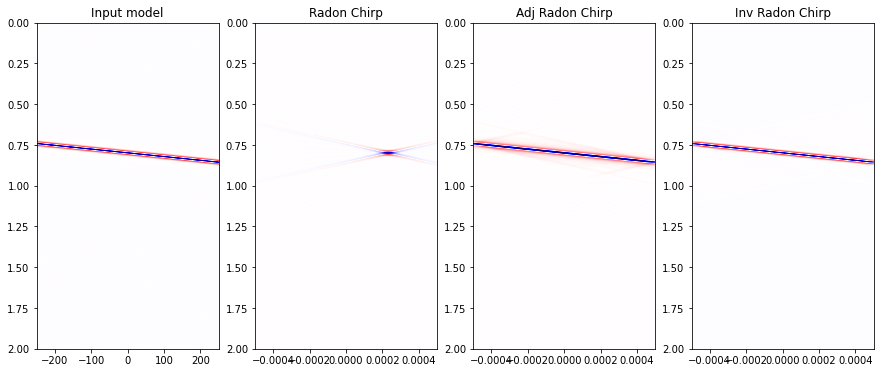

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(15, 6))
axs[0].imshow(cp.asnumpy(d).T, vmin=-1, vmax=1, cmap='seismic_r',
              extent=(x[0], x[-1], t[-1], t[0]))
axs[0].set_title('Input model')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(dL_chirp).T, cmap='seismic_r', vmin=-dL_chirp.max(), vmax=dL_chirp.max(),
              extent=(px[0], px[-1], t[-1], t[0]))
axs[1].set_title('Radon Chirp')
axs[1].axis('tight')
axs[2].imshow(cp.asnumpy(dadj_chirp).T, cmap='seismic_r', vmin=-dadj_chirp.max(), vmax=dadj_chirp.max(),
              extent=(px[0], px[-1], t[-1], t[0]))
axs[2].set_title('Adj Radon Chirp')
axs[2].axis('tight')
axs[3].imshow(cp.asnumpy(dinv_chirp).T, cmap='seismic_r', vmin=-d.max(), vmax=d.max(),
              extent=(px[0], px[-1], t[-1], t[0]))
axs[3].set_title('Inv Radon Chirp')
axs[3].axis('tight');

In [15]:
d_np = cp.asnumpy(d) 

%timeit -n2 -r2 R2Op * d.ravel()
%timeit -n2 -r2 R2Op * d_np.ravel()

2 loops, best of 2: 11.5 ms per loop
2 loops, best of 2: 74.8 ms per loop


In [16]:
par = {'ot': 0,    'dt': 0.004, 'nt': 201,
       'ox': -625, 'dx': 12.5, 'nx': 101,
       'oy': -625, 'dy': 12.5, 'ny': 101,
       'f0': 20}
theta = [0, ]
t0 = [0.5, ]
amp = [1., ]

# Create axis
t, t2, x, y = makeaxis(par)
dt, dx, dy = par['dt'], par['dx'], par['dy']

# Create wavelet
wav = ricker(t[:41], f0=par['f0'])[0]

# Generate model
_, d = linear3d(x, y, t, 1500., t0, theta, [0, ], amp, wav)

d = cp.array(d)

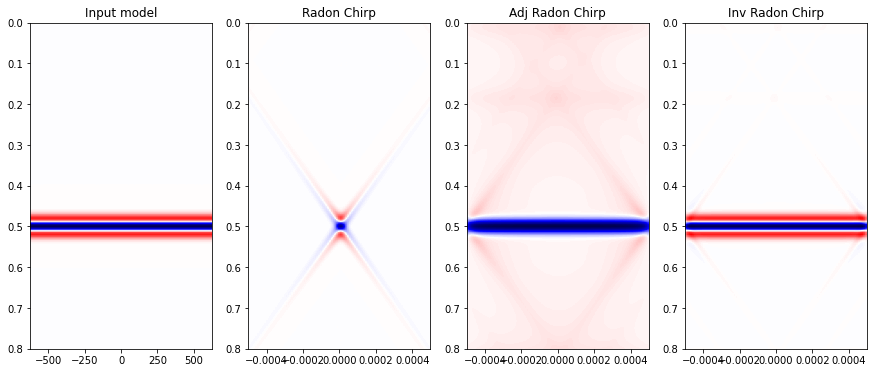

In [17]:
npy, pymax = par['ny'], 5e-4
npx, pxmax = par['nx'], 5e-4

py = np.linspace(-pymax, pymax, npy)
px = np.linspace(-pxmax, pxmax, npx)

R3Op = ChirpRadon3D(t, y, x, (pymax*dy/dt, pxmax*dx/dt), dtype='float64')

dL_chirp = R3Op * d.ravel()
dadj_chirp = R3Op.H * dL_chirp
dinv_chirp = R3Op.inverse(dL_chirp)

dL_chirp = dL_chirp.reshape(par['ny'], par['nx'], par['nt'])
dadj_chirp = dadj_chirp.reshape(par['ny'], par['nx'], par['nt'])
dinv_chirp = dinv_chirp.reshape(par['ny'], par['nx'], par['nt'])

fig, axs = plt.subplots(1, 4, figsize=(15, 6))
axs[0].imshow(cp.asnumpy(d[par['ny']//2]).T, vmin=-1, vmax=1, cmap='seismic_r',
              extent=(x[0], x[-1], t[-1], t[0]))
axs[0].set_title('Input model')
axs[0].axis('tight')
axs[1].imshow(cp.asnumpy(dL_chirp[npy//2]).T, cmap='seismic_r', vmin=-dL_chirp.max(), vmax=dL_chirp.max(),
              extent=(px[0], px[-1], t[-1], t[0]))
axs[1].set_title('Radon Chirp')
axs[1].axis('tight')
axs[2].imshow(cp.asnumpy(dadj_chirp[npy//2]).T, cmap='seismic_r', vmin=-dadj_chirp.max(), vmax=dadj_chirp.max(),
              extent=(px[0], px[-1], t[-1], t[0]))
axs[2].set_title('Adj Radon Chirp')
axs[2].axis('tight')
axs[3].imshow(cp.asnumpy(dinv_chirp[npy//2]).T, cmap='seismic_r', vmin=-d.max(), vmax=d.max(),
              extent=(px[0], px[-1], t[-1], t[0]))
axs[3].set_title('Inv Radon Chirp')
axs[3].axis('tight');

In [18]:
d_np = cp.asnumpy(d) 

%timeit -n2 -r2 R3Op * d.ravel()
%timeit -n2 -r2 R3Op * d_np.ravel()

2 loops, best of 2: 2.95 ms per loop
2 loops, best of 2: 2.15 s per loop
